<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/WEEK_8_ENSEMBLE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Random Forest (n_estimators=1) Performance:
Accuracy: 0.9474, Precision: 0.9626, Recall: 0.9537, F1-score: 0.9581

Random Forest (n_estimators=5) Performance:
Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722

Random Forest (n_estimators=10) Performance:
Accuracy: 0.9649, Precision: 0.9722, Recall: 0.9722, F1-score: 0.9722

Random Forest (n_estimators=50) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772

Random Forest (n_estimators=100) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772

Random Forest (n_estimators=200) Performance:
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907, F1-score: 0.9772



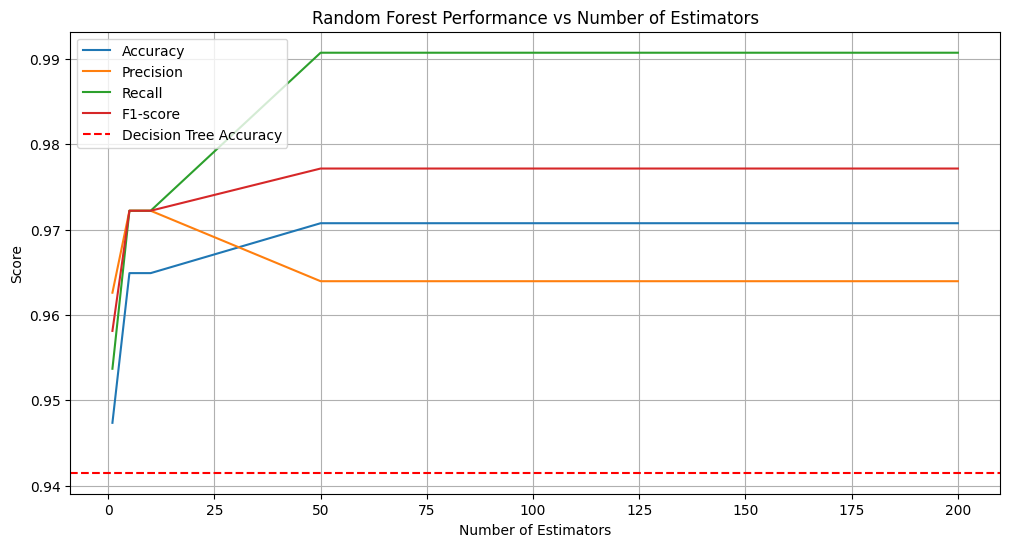

In [2]:
# 1
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {dt_acc:.4f}, Precision: {dt_prec:.4f}, Recall: {dt_rec:.4f}, F1-score: {dt_f1:.4f}\n")

# Explore Random Forest with different number of estimators
estimators_range = [1, 5, 10, 50, 100, 200]
rf_results = []

for n_estimators in estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)

    rf_results.append((n_estimators, acc, prec, rec, f1))
    print(f"Random Forest (n_estimators={n_estimators}) Performance:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")

# Plot results
rf_results = np.array(rf_results)
plt.figure(figsize=(12, 6))
plt.plot(rf_results[:, 0], rf_results[:, 1], label='Accuracy')
plt.plot(rf_results[:, 0], rf_results[:, 2], label='Precision')
plt.plot(rf_results[:, 0], rf_results[:, 3], label='Recall')
plt.plot(rf_results[:, 0], rf_results[:, 4], label='F1-score')

plt.axhline(y=dt_acc, color='r', linestyle='--', label='Decision Tree Accuracy')
plt.title("Random Forest Performance vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# 2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features — important for Logistic Regression and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter to 2000
knn = KNeighborsClassifier()

# Train base classifiers
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict classes and probabilities from each model
preds_dt = dt.predict(X_test)
preds_lr = lr.predict(X_test)
preds_knn = knn.predict(X_test)

probs_dt = dt.predict_proba(X_test)
probs_lr = lr.predict_proba(X_test)
probs_knn = knn.predict_proba(X_test)

# Evaluate base classifiers
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")
    return f1  # return f1 to use for weights

f1_dt = evaluate_model("Decision Tree", y_test, preds_dt)
f1_lr = evaluate_model("Logistic Regression", y_test, preds_lr)
f1_knn = evaluate_model("K-Nearest Neighbors", y_test, preds_knn)

# ----------------------------------------
# Simple Ensemble Techniques
# ----------------------------------------

# 1. Max Voting (Majority voting on class predictions)
all_preds = np.array([preds_dt, preds_lr, preds_knn])
max_vote_preds = []
for i in range(all_preds.shape[1]):
    counts = np.bincount(all_preds[:, i])
    max_vote_preds.append(np.argmax(counts))
max_vote_preds = np.array(max_vote_preds)
evaluate_model("Ensemble - Max Voting", y_test, max_vote_preds)

# 2. Average Voting (Soft voting)
avg_probs = (probs_dt + probs_lr + probs_knn) / 3
avg_vote_preds = np.argmax(avg_probs, axis=1)
evaluate_model("Ensemble - Average Voting", y_test, avg_vote_preds)

# 3. Weighted Average Voting
weights = np.array([f1_dt, f1_lr, f1_knn])
weights = weights / np.sum(weights)  # normalize weights
weighted_probs = (weights[0]*probs_dt) + (weights[1]*probs_lr) + (weights[2]*probs_knn)
weighted_vote_preds = np.argmax(weighted_probs, axis=1)
evaluate_model("Ensemble - Weighted Average Voting", y_test, weighted_vote_preds)

# -----------------------------
# Corrected Observations (continued from your message):
'''
- Max Voting works best when all base classifiers have similar performance.
- Average Voting benefits from classifiers that provide reliable probability estimates.
- Weighted Voting improves predictions by emphasizing stronger models, especially when base classifiers have varying accuracies.
'''


Decision Tree Performance:
Accuracy: 0.9415, Precision: 0.9712, Recall: 0.9352, F1-score: 0.9528

Logistic Regression Performance:
Accuracy: 0.9825, Precision: 0.9907, Recall: 0.9815, F1-score: 0.9860

K-Nearest Neighbors Performance:
Accuracy: 0.9591, Precision: 0.9633, Recall: 0.9722, F1-score: 0.9677

Ensemble - Max Voting Performance:
Accuracy: 0.9942, Precision: 0.9908, Recall: 1.0000, F1-score: 0.9954

Ensemble - Average Voting Performance:
Accuracy: 0.9883, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907

Ensemble - Weighted Average Voting Performance:
Accuracy: 0.9883, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907



'\n- Max Voting works best when all base classifiers have similar performance.\n- Average Voting benefits from classifiers that provide reliable probability estimates.\n- Weighted Voting improves predictions by emphasizing stronger models, especially when base classifiers have varying accuracies.\n'

In [ ]:
# 3
